#Tidal Prediction for BHP Station

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import sklearn as sl
import statsmodels as sm
import seaborn as sns
import plotly.express as px

from IPython.display import display
from scipy import stats
import matplotlib.pyplot as plt
import random as r
from matplotlib import pyplot
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
import matplotlib.dates as mdates


###Lodaing the data for prediction

In [ ]:
dfTrain = pd.read_csv('BHPtraining(1).csv',index_col=[0], parse_dates =['Date Time'], squeeze=True )
dfTest = pd.read_csv('BHPtest.csv',index_col=[0], parse_dates =['Date Time'], squeeze=True )

In [ ]:
dfTrain

,Air Temperature,Water Level,Water Level Sigma,Wind Speed,Wind Direction,Wind Gust
Date Time,,,,,,
2017-01-01 00:00:00,NaN,2.418,0.000,NaN,NaN,NaN
2017-01-01 00:06:00,63.9,2.470,0.184,5.64,145.0,6.80
2017-01-01 00:12:00,63.9,2.415,0.203,5.44,141.0,6.22
2017-01-01 00:18:00,63.9,2.470,0.167,4.86,142.0,5.44
2017-01-01 00:24:00,63.9,2.474,0.144,5.44,135.0,5.64
...,...,...,...,...,...,...
2019-12-31 23:30:00,58.8,1.444,0.200,14.00,40.0,15.55
2019-12-31 23:36:00,58.8,1.381,0.184,13.61,32.0,16.13
2019-12-31 23:42:00,58.8,1.493,0.230,13.41,31.0,15.16


In [ ]:
dfTest

,Air Temperature,Water Level,Water Level Sigma,Wind Speed,Wind Direction,Wind Gust
Date Time,,,,,,
2020-01-01 00:00:00,59.0,1.499,0.197,12.44,30.0,15.94
2020-01-01 00:06:00,59.0,1.486,0.180,13.41,33.0,16.33
2020-01-01 00:12:00,59.2,1.490,0.194,12.83,37.0,14.97
2020-01-01 00:18:00,59.2,1.578,0.223,12.44,34.0,15.16
2020-01-01 00:24:00,59.0,1.522,0.194,13.22,28.0,16.13
...,...,...,...,...,...,...
2020-10-21 01:24:00,79.5,3.143,0.394,14.38,75.0,16.13
2020-10-21 01:30:00,79.5,3.087,0.390,13.80,79.0,15.55
2020-10-21 01:36:00,79.5,3.159,0.413,13.22,77.0,15.55


In [ ]:
dfTrain.isnull().sum()

Air Temperature      56097
Water Level              0
Water Level Sigma      357
Wind Speed           42365
Wind Direction       42365
Wind Gust            42365
dtype: int64

In [ ]:
dfTest.isnull().sum()

Air Temperature      525
Water Level           84
Water Level Sigma     84
Wind Speed           527
Wind Direction       527
Wind Gust            527
dtype: int64

In [ ]:
dfTrain.describe()

,Air Temperature,Water Level,Water Level Sigma,Wind Speed,Wind Direction,Wind Gust
count,206703.000000,262800.000000,262443.000000,220435.000000,220435.000000,220435.000000
mean,72.887253,1.478804,0.252333,12.373317,147.097539,14.439480
std,12.192700,0.730270,0.253112,5.335261,96.099432,6.253577
min,28.400000,-1.463000,0.000000,0.000000,0.000000,0.000000
25%,63.700000,1.010000,0.089000,8.550000,92.000000,9.910000
50%,77.200000,1.503000,0.220000,12.250000,125.000000,14.000000
75%,83.100000,1.952000,0.371000,15.940000,162.000000,18.470000
max,104.500000,5.164000,11.693000,49.370000,360.000000,65.310000


In [ ]:
dfTest.describe()

,Air Temperature,Water Level,Water Level Sigma,Wind Speed,Wind Direction,Wind Gust
count,70054.000000,70495.000000,70495.000000,70052.000000,70052.000000,70052.000000
mean,75.408017,1.664226,0.275540,12.364031,139.275495,14.427951
std,9.367018,0.785597,0.205379,5.198722,90.635945,6.061196
min,41.000000,-1.312000,0.000000,0.000000,0.000000,0.000000
25%,68.500000,1.145000,0.115000,8.750000,85.000000,10.110000
50%,78.400000,1.696000,0.256000,12.250000,120.000000,14.000000
75%,82.400000,2.142000,0.390000,15.750000,152.000000,18.270000
max,103.300000,7.051000,1.325000,46.650000,360.000000,59.090000


###Generic plotting of the training data

[]

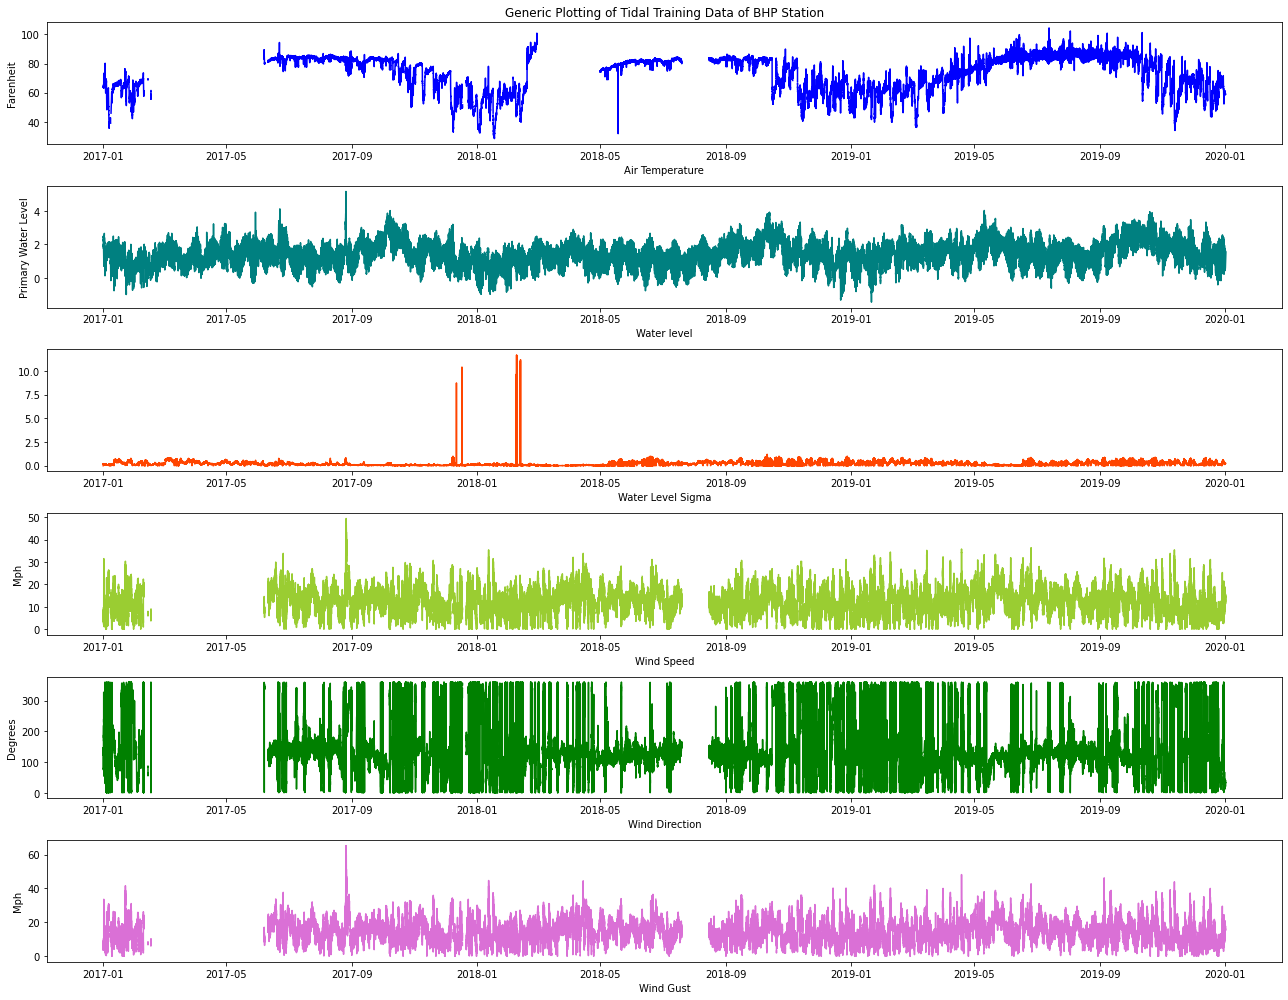

In [ ]:
fig, ax = plt.subplots(6,1,figsize = (18,14))
ax[0].set_title("Generic Plotting of Tidal Training Data of BHP Station")
ax[0].plot(dfTrain.index, dfTrain["Air Temperature"], color = "blue")
ax[0].set_xlabel("Air Temperature")
ax[0].set(ylabel = 'Farenheit')
ax[1].plot(dfTrain.index, dfTrain["Water Level"], color = "teal")
ax[1].set_xlabel("Water level")
ax[1].set(ylabel = 'Primary Water Level')
ax[2].plot(dfTrain.index, dfTrain["Water Level Sigma"], color = "orangered")
ax[2].set_xlabel("Water Level Sigma")
ax[3].plot(dfTrain.index, dfTrain["Wind Speed"], color="yellowgreen")
ax[3].set_xlabel("Wind Speed")
ax[3].set(ylabel = 'Mph')
ax[4].plot(dfTrain.index, dfTrain["Wind Direction"], color = "green")
ax[4].set_xlabel("Wind Direction")
ax[4].set(ylabel = 'Degrees')
ax[5].plot(dfTrain.index, dfTrain["Wind Gust"], color = "orchid")
ax[5].set_xlabel("Wind Gust")
ax[5].set(ylabel = 'Mph')
plt.tight_layout();
plt.plot()

###Generic potting of the test data

[]

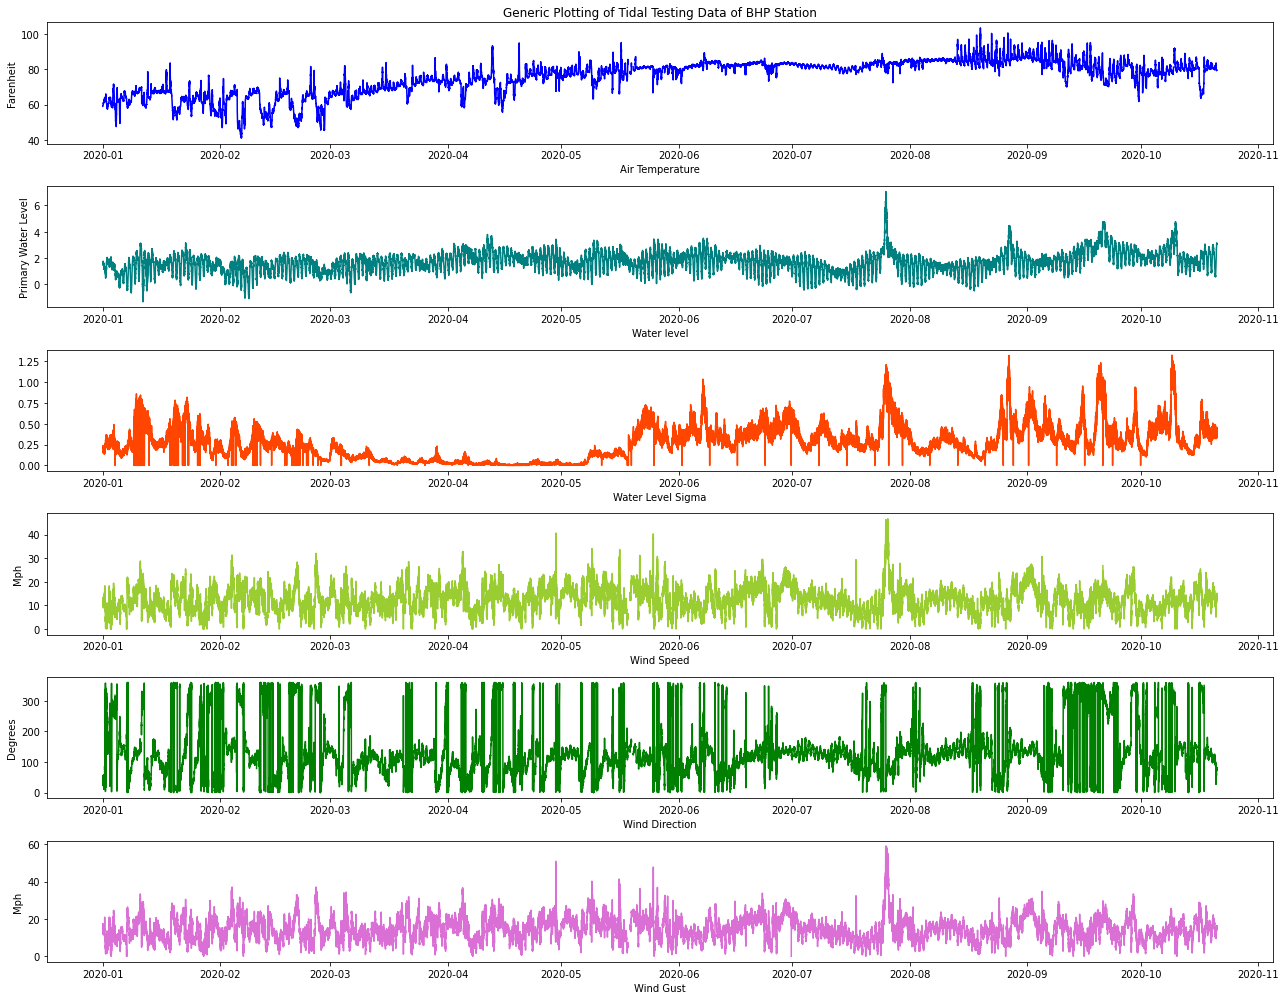

In [ ]:
fig, ax = plt.subplots(6,1,figsize = (18,14))
ax[0].set_title("Generic Plotting of Tidal Testing Data of BHP Station")
ax[0].plot(dfTest.index, dfTest["Air Temperature"], color = "blue")
ax[0].set_xlabel("Air Temperature")
ax[0].set(ylabel = 'Farenheit')
ax[1].plot(dfTest.index, dfTest["Water Level"], color = "teal")
ax[1].set_xlabel("Water level")
ax[1].set(ylabel = 'Primary Water Level')
ax[2].plot(dfTest.index, dfTest["Water Level Sigma"], color = "orangered")
ax[2].set_xlabel("Water Level Sigma")
ax[3].plot(dfTest.index, dfTest["Wind Speed"], color="yellowgreen")
ax[3].set_xlabel("Wind Speed")
ax[3].set(ylabel = 'Mph')
ax[4].plot(dfTest.index, dfTest["Wind Direction"], color = "green")
ax[4].set_xlabel("Wind Direction")
ax[4].set(ylabel = 'Degrees')
ax[5].plot(dfTest.index, dfTest["Wind Gust"], color = "orchid")
ax[5].set_xlabel("Wind Gust")
ax[5].set(ylabel = 'Mph')
plt.tight_layout();
plt.plot()

###Resampling the data to hourly format as our predictions are also going to be hourly

In [ ]:
dfTrain = dfTrain.resample('H').mean()
dfTest = dfTest.resample('H').mean()

In [ ]:
dfTrain['Water Level'] = dfTrain['Water Level'].interpolate(method='time')
dfTrain['Air Temperature'] = dfTrain['Air Temperature'].interpolate(method='time')

###Generic plotting of Water Level data after cleaning it

[]

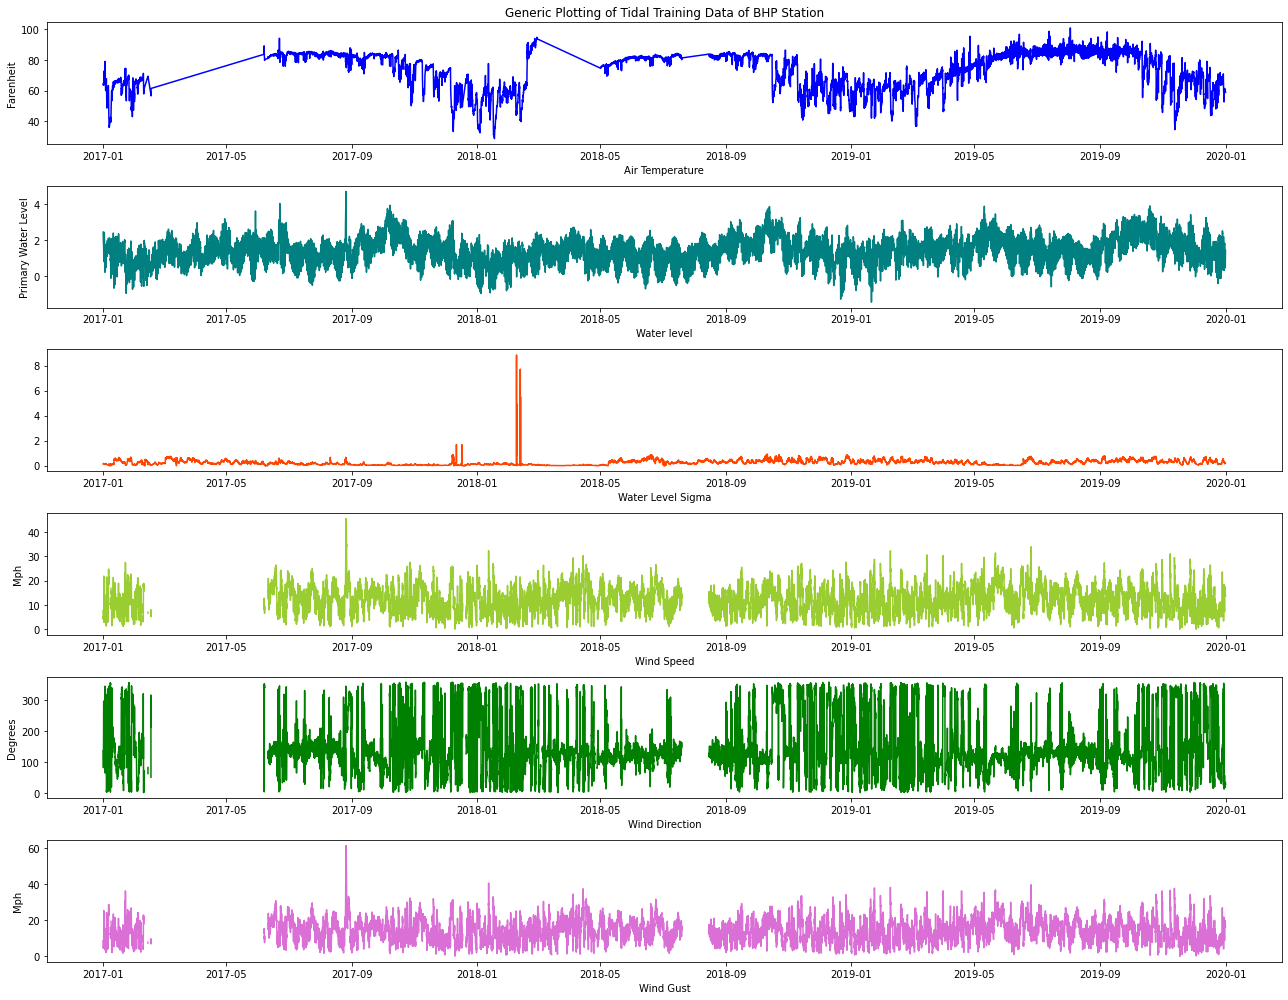

In [ ]:
fig, ax = plt.subplots(6,1,figsize = (18,14))
ax[0].set_title("Generic Plotting of Tidal Training Data of BHP Station")
ax[0].plot(dfTrain.index, dfTrain["Air Temperature"], color = "blue")
ax[0].set_xlabel("Air Temperature")
ax[0].set(ylabel = 'Farenheit')
ax[1].plot(dfTrain.index, dfTrain["Water Level"], color = "teal")
ax[1].set_xlabel("Water level")
ax[1].set(ylabel = 'Primary Water Level')
ax[2].plot(dfTrain.index, dfTrain["Water Level Sigma"], color = "orangered")
ax[2].set_xlabel("Water Level Sigma")
ax[3].plot(dfTrain.index, dfTrain["Wind Speed"], color="yellowgreen")
ax[3].set_xlabel("Wind Speed")
ax[3].set(ylabel = 'Mph')
ax[4].plot(dfTrain.index, dfTrain["Wind Direction"], color = "green")
ax[4].set_xlabel("Wind Direction")
ax[4].set(ylabel = 'Degrees')
ax[5].plot(dfTrain.index, dfTrain["Wind Gust"], color = "orchid")
ax[5].set_xlabel("Wind Gust")
ax[5].set(ylabel = 'Mph')
plt.tight_layout();
plt.plot()

###Correlation of all the features with each other

In [ ]:
dfTrain.corr()#Only wind speed is highly corelated with wind gust.

,Air Temperature,Water Level,Water Level Sigma,Wind Speed,Wind Direction,Wind Gust
Air Temperature,1.000000,0.171522,-0.114165,0.114119,-0.398591,0.076626
Water Level,0.171522,1.000000,0.134357,0.071218,-0.039454,0.075396
Water Level Sigma,-0.114165,0.134357,1.000000,0.131960,0.065266,0.138408
Wind Speed,0.114119,0.071218,0.131960,1.000000,0.005481,0.992303
Wind Direction,-0.398591,-0.039454,0.065266,0.005481,1.000000,0.070219
Wind Gust,0.076626,0.075396,0.138408,0.992303,0.070219,1.000000


#Checking the linearity of the data.

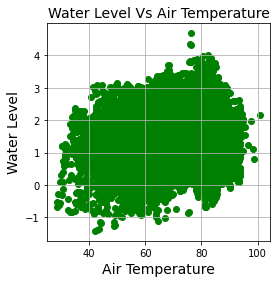

<Figure size 432x288 with 0 Axes>

In [ ]:
df = dfTrain 
plt.figure(figsize=(4,4))
plt.scatter(df['Air Temperature'], df['Water Level'], color='green')
plt.title('Water Level Vs Air Temperature', fontsize=14)
plt.xlabel('Air Temperature', fontsize=14)
plt.ylabel('Water Level', fontsize=14)
plt.grid(True)
plt.show()
plt.savefig('linearity4.png')  


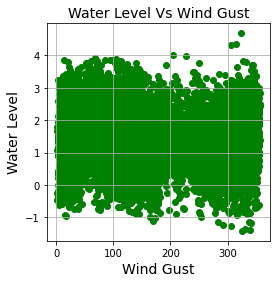

<Figure size 432x288 with 0 Axes>

In [ ]:
df = dfTrain 
plt.figure(figsize=(4,4))
plt.scatter(df['Wind Direction'], df['Water Level'], color='green')
plt.title('Water Level Vs Wind Gust', fontsize=14)
plt.xlabel('Wind Gust', fontsize=14)
plt.ylabel('Water Level', fontsize=14)
plt.grid(True)
plt.show()
plt.savefig('linearity3.png')  

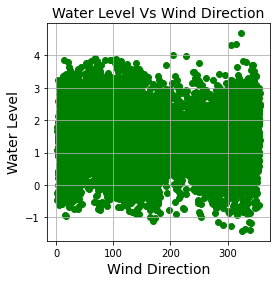

<Figure size 432x288 with 0 Axes>

In [ ]:
df = dfTrain 
plt.figure(figsize=(4,4))
plt.scatter(df['Wind Direction'], df['Water Level'], color='green')
plt.title('Water Level Vs Wind Direction', fontsize=14)
plt.xlabel('Wind Direction', fontsize=14)
plt.ylabel('Water Level', fontsize=14)
plt.grid(True)
plt.show()
plt.savefig('linearity2.png')  

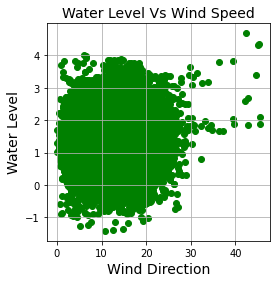

<Figure size 432x288 with 0 Axes>

In [ ]:
df = dfTrain 
plt.figure(figsize=(4,4))
plt.scatter(df['Wind Speed'], df['Water Level'], color='green')
plt.title('Water Level Vs Wind Speed', fontsize=14)
plt.xlabel('Wind Direction', fontsize=14)
plt.ylabel('Water Level', fontsize=14)
plt.grid(True)
plt.show()
plt.savefig('linearity1.png')  


###Plotting wind speed vs wind gust to show the linearity

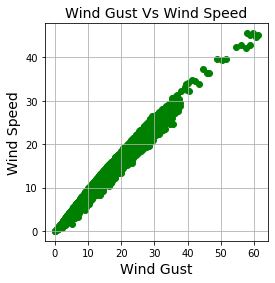

<Figure size 432x288 with 0 Axes>

In [ ]:
df = dfTrain 
plt.figure(figsize=(4,4))
plt.scatter(df['Wind Gust'], df['Wind Speed'], color='green')
plt.title('Wind Gust Vs Wind Speed', fontsize=14)
plt.xlabel('Wind Gust', fontsize=14)
plt.ylabel('Wind Speed', fontsize=14)
plt.grid(True)
plt.show()
plt.savefig('linearity5.png')  

###Modle Creation
###I will be using Multiple Linear Regression for water level prediction

In [ ]:
Trainig_df = dfTrain.reindex(columns=['Air Temperature', 'Water Level Sigma', 'Wind Speed','Wind Direction','Wind Gust','Water Level']).copy()
Testing_df = dfTest.reindex(columns=['Air Temperature', 'Water Level Sigma', 'Wind Speed','Wind Direction','Wind Gust','Water Level']).copy()

In [ ]:
Testing_df = Testing_df.interpolate(method='time')
Testing_df.isnull().sum()

Air Temperature      0
Water Level Sigma    0
Wind Speed           0
Wind Direction       0
Wind Gust            0
Water Level          0
dtype: int64

In [ ]:
# Took reference from Jacob's code. THis function will add time lags to the training and testing data.
def time_lags(train, test, lags):
  #attach more data to testing_tl to ensure the first few test data instances have their time lags
  test = pd.concat([train.tail(lags+24), test])
  #Start at 24 hours 
  for i in range(24,lags+24):
    test['Time-Lags{}'.format(i-23)] = test['Water Level'].shift(i)
    train['Time-Lags{}'.format(i-23)] = train['Water Level'].shift(i)
  #the entries in train and test before the lags do not have a complete set of time lags so drop them from the dataframes
  train = train.drop(train.iloc[0:lags+24].index)
  test = test.drop(test.iloc[0:lags+24].index)
  return (train, test)



##Model1

###All my models will predict the water level based on the previous water levels. The first model will have water level data with timelags of 13. The reason why we chose 13 is because the tide occurs every 12 hours and 5 minutes and so rounding it up to 13.

##Modle 2
### This model will have water level data with 25 time lags as in the entire daya, we get two tides one in 12.5 hours and the other at 24.5 hours so rouding it to 25.

## Model 3 
##This is with 50 lags becase two tidal days are approximately at 49 hours so rounded up to 50




##Model Construction

In [ ]:

Trainig_df = Trainig_df.drop(columns=['Air Temperature','Water Level Sigma','Wind Direction','Wind Gust','Wind Speed'])
Testing_df = Testing_df.drop(columns=['Air Temperature','Water Level Sigma','Wind Direction','Wind Gust','Wind Speed'])
#target_scaler = MinMaxScaler(feature_range=(0,1))
#Trainig_df['Water Level'] = target_scaler.fit_transform(Trainig_df['Water Level'].values.reshape(-1,1))
#Testing_df['Water Level'] = target_scaler.transform(Testing_df['Water Level'].values.reshape(-1,1))

Enter the model number: 2
 
R2Sore: 0.7848265233559177
Mean Squared Error: 0.14774640964355332
Mean Absolute Error: 0.26627773353652834
Median Absolute Error: 0.2001200799002001
Root Mean Square Error: 0.3843779515575176
Max_err: 2.708923322373301


,Actual,Predicted
2020-01-01 00:00:00,1.5348,1.640534
2020-01-01 12:00:00,1.2243,1.268602
2020-01-02 00:00:00,1.5947,1.476762
2020-01-02 12:00:00,1.7612,1.324434
2020-01-03 00:00:00,1.8290,1.515935
...,...,...
2020-10-19 00:00:00,2.8022,2.715145
2020-10-19 12:00:00,1.4808,1.264889
2020-10-20 00:00:00,2.9639,2.747455
2020-10-20 12:00:00,1.4696,1.681581


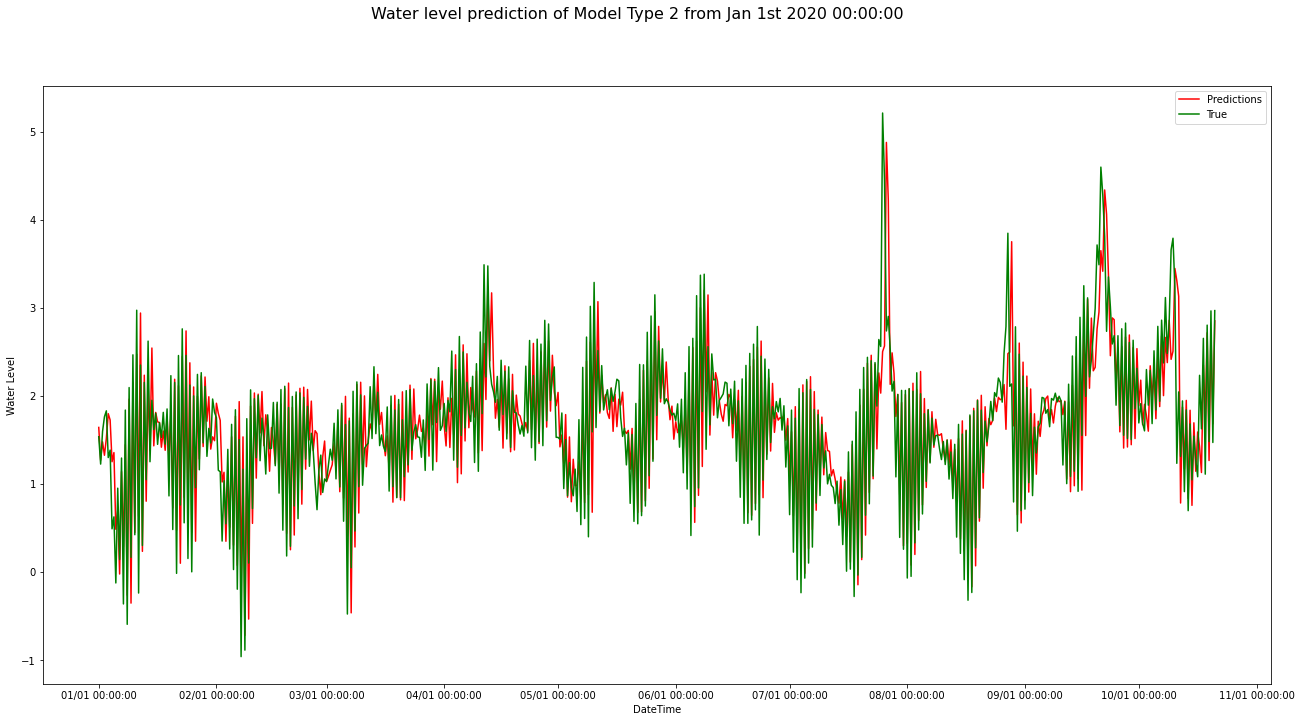

In [ ]:

modelSelected = int(input("Enter the model number: "))


if modelSelected >3 or modelSelected <=0:
  print("Wrong Selecetion")

elif modelSelected == 1:

  
  training_df_M1 = Trainig_df.copy()
  testing_df_M1 = Testing_df.copy()
  training_df_M1, testing_df_M1 = time_lags(training_df_M1, testing_df_M1, 13)
  dates = pd.date_range('2020-01-01','2020-10-21 00:00:00',freq='12H')#Changing the frequency will give us the diffirent result. For entire next day we can make it 24
  testing_df_M1 = testing_df_M1.reindex(dates)
  XTrain = training_df_M1.iloc[:,1:14]
  YTrain = training_df_M1['Water Level']
  XTest = testing_df_M1.iloc[:,1:14]
  YTest = testing_df_M1['Water Level']
  reg = LinearRegression()
  reg.fit(XTrain,YTrain)
  ypredict = reg.predict(XTest)
  r2score = r2_score(YTest,ypredict)
  mse = metrics.mean_squared_error(YTest, ypredict)
  mean_absolute_error = metrics.mean_absolute_error(YTest, ypredict)
  med_ae = metrics.median_absolute_error(YTest,ypredict)
  rmse=np.sqrt(metrics.mean_squared_error(YTest, ypredict))
  maxError =metrics.max_error(YTest, ypredict)
  print(" ")
  print("R2Sore:",r2score)
  print("Mean Squared Error:",mse)
  print("Mean Absolute Error:",mean_absolute_error)
  print("Median Absolute Error:",med_ae)
  print("Root Mean Square Error:",rmse)
  print("Max_err:",maxError)

  df_predictionsvsactual = pd.DataFrame({'Actual': YTest, 'Predicted': ypredict})

  display(df_predictionsvsactual)

  fig, ax = plt.subplots(1,1, figsize=(22,11))
  fig.suptitle("Water level prediction of Model Type {} from Jan 1st 2020 00:00:00".format(modelSelected), size=16)
  ax.set(xlabel = 'DateTime', ylabel = 'Water Level')
  ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d %H:%M:%S"))
  ax.plot(YTest.index, ypredict, color='red', label='Predictions')
  ax.plot(YTest.index, YTest, color='green', label='True')
  ax.legend()
  plt.savefig('predictedvsactualm1.png')  

  
elif modelSelected == 2:

  training_df_M2 = Trainig_df.copy()
  testing_df_M2 = Testing_df.copy() 
  training_df_M2, testing_df_M2 = time_lags(training_df_M2, testing_df_M2, 25)
  dates = pd.date_range('2020-01-01','2020-10-21 00:00:00',freq='12H')
  testing_df_M2 = testing_df_M2.reindex(dates)
  XTrain = training_df_M2.iloc[:,1:26]
  YTrain = training_df_M2['Water Level']
  XTest = testing_df_M2.iloc[:,1:26]
  YTest = testing_df_M2['Water Level']
  reg = LinearRegression()
  reg.fit(XTrain,YTrain)
  ypredict = reg.predict(XTest)
  r2score = r2_score(YTest,ypredict)
  mse = metrics.mean_squared_error(YTest, ypredict)
  mean_absolute_error = metrics.mean_absolute_error(YTest, ypredict)
  med_ae = metrics.median_absolute_error(YTest,ypredict)
  rmse=np.sqrt(metrics.mean_squared_error(YTest, ypredict))
  maxError = metrics.max_error(YTest, ypredict)
  print(" ")
  print("R2Sore:",r2score)
  print("Mean Squared Error:",mse)
  print("Mean Absolute Error:",mean_absolute_error)
  print("Median Absolute Error:",med_ae)
  print("Root Mean Square Error:",rmse)
  print("Max_err:",maxError)

  

  df_predictions = pd.DataFrame({'Actual': YTest, 'Predicted': ypredict})
  display(df_predictions)
  
  fig, ax = plt.subplots(1,1, figsize=(22,11))
  fig.suptitle("Water level prediction of Model Type {} from Jan 1st 2020 00:00:00".format(modelSelected), size=16)
  ax.set(xlabel = 'DateTime', ylabel = 'Water Level')
  ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d %H:%M:%S"))
  ax.plot(YTest.index, ypredict, color='red', label='Predictions')
  ax.plot(YTest.index, YTest, color='green', label='True')
  ax.legend()
  plt.savefig('predictedvsactualm2.png')  
  
else:
  training_df_M3 = Trainig_df.copy()
  testing_df_M3 = Testing_df.copy() 
  training_df_M3, testing_df_M3 = time_lags(training_df_M3, testing_df_M3, 50)
  dates = pd.date_range('2020-01-01','2020-10-21 00:00:00',freq='12H')
  testing_df_M3 = testing_df_M3.reindex(dates)
  XTrain = training_df_M3.iloc[:,1:51]
  YTrain = training_df_M3['Water Level']
  XTest = testing_df_M3.iloc[:,1:51]
  YTest = testing_df_M3['Water Level']
  reg = LinearRegression()
  reg.fit(XTrain,YTrain)
  ypredict = reg.predict(XTest)
  r2score = r2_score(YTest,ypredict)
  mse = metrics.mean_squared_error(YTest, ypredict)
  mean_absolute_error = metrics.mean_absolute_error(YTest, ypredict)
  med_ae = metrics.median_absolute_error(YTest,ypredict)
  rmse=np.sqrt(metrics.mean_squared_error(YTest, ypredict))
  maxError = metrics.max_error(YTest, ypredict)
  print(" ")
  print("R2Sore:",r2score)
  print("Mean Squared Error:",mse)
  print("Mean Absolute Error:",mean_absolute_error)
  print("Median Absolute Error:",med_ae)
  print("Root Mean Square Error:",rmse)
  print("Max_err:",maxError)

  df_predictions = pd.DataFrame({'Actual': YTest, 'Predicted': ypredict})
  display(df_predictions)
  
  
  fig, ax = plt.subplots(1,1, figsize=(22,11))
  fig.suptitle("Water level prediction of Model Type {} from Jan 1st 2020 00:00:00".format(modelSelected), size=16)
  ax.set(xlabel = 'DateTime', ylabel = 'Water Level')
  ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d %H:%M:%S"))
  ax.plot(YTest.index, ypredict, color='red', label='Predictions')
  ax.plot(YTest.index, YTest, color='green', label='True')
  ax.legend()
  plt.savefig('predictedvsactualm3.png')  

